# Ejercicio, Jesús Martñin Mejías

In [1]:
import pandas as pd
import numpy as np


rn_state = 33 # random state for reproducibility

# Ejercicio 1 Predicción de enfermedades cardiovasculares
Se ha desarrollado un nuevo sistema de detección temprana
de patologías cardiovasculares. Sin embargo, hacer la
prueba y el diagnóstico es un proceso costoso y lento. Por lo
tanto, tu compañía te pide desarrollar un algoritmo para
eliminar casos que no requieren de una detección tan fina.
Se te pide:
1. Seleccionar un algoritmo que ya hayamos estudiado
para poder detectar pacientes con o sin patología
cardiovascular.
2. Mostrar resultados de tu algoritmo, intentando
responder a las peticiones concretas de vuestro cliente.
3. Investigar otros posibles algoritmos fuera de los
estudiados como otras alternativas. También te
proponemos una tarea opcional: implementar uno de
estos algoritmos.

# Carga y Preparación de datos

In [2]:
df = pd.read_csv('data/Cardiovascular_Disease_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [3]:
df['target'].value_counts()

target
1    580
0    420
Name: count, dtype: int64

# Limpieza de datos
Quito las columnas no necesarias para entrenar el modelo, como id, y verifico si hay datos con NaN

In [4]:
df_clean = df.drop(columns=['patientid']) # drop patient_id column
df_clean.isna().sum()
df_clean.head()


,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


Este dataset ya está limpio, por lo que tan sólo necesitamos dividirlo en train y test.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop(columns=['target']), 
    df_clean['target'], 
    test_size=0.2, 
    random_state=rn_state)

## Árboles de decisión

Empezaremos estudiando los árboles de decisión, que son un modelo muy sencillo de entender y que nos permitirá ver cómo se comportan los modelos de clasificación.
Una vez más usaremos la librería de scikit-learn. Y veremos que el uso de los modelos es igual.

In [6]:
from sklearn import tree 

DT = tree.DecisionTreeClassifier(random_state=rn_state)
DT.fit(X_train, y_train)


DecisionTreeClassifier(random_state=33)

Vamos a ver el score que es el accuracy del modelo

In [7]:
print('Accuracy en entrenamiento %.2f'%DT.score(X_train, y_train))
print('Accuracy en test %.2f'%DT.score(X_test, y_test))

Accuracy en entrenamiento 1.00
Accuracy en test 0.92


Tenemos un accuracy perfecto tanto en entrenamiento pero de 92 en test,por lo que en el test comete un 8% de fallos

Una ventaja de los árboles de decisión es que podemos visualizarlos

[Text(0.5597014925373134, 0.9545454545454546, 'slope <= 1.5\ngini = 0.493\nsamples = 800\nvalue = [353, 447]\nclass = 0'),
 Text(0.3283582089552239, 0.8636363636363636, 'chestpain <= 1.5\ngini = 0.225\nsamples = 394\nvalue = [343, 51]\nclass = 1'),
 Text(0.16417910447761194, 0.7727272727272727, 'serumcholestrol <= 66.0\ngini = 0.122\nsamples = 338\nvalue = [316, 22]\nclass = 1'),
 Text(0.13432835820895522, 0.6818181818181818, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 0'),
 Text(0.19402985074626866, 0.6818181818181818, 'serumcholestrol <= 466.0\ngini = 0.097\nsamples = 333\nvalue = [316, 17]\nclass = 1'),
 Text(0.16417910447761194, 0.5909090909090909, 'restingBP <= 166.0\ngini = 0.076\nsamples = 329\nvalue = [316, 13]\nclass = 1'),
 Text(0.05970149253731343, 0.5, 'restingrelectro <= 1.5\ngini = 0.007\nsamples = 281\nvalue = [280, 1]\nclass = 1'),
 Text(0.029850746268656716, 0.4090909090909091, 'gini = 0.0\nsamples = 274\nvalue = [274, 0]\nclass = 1'),
 Text(0.08955223880597014, 

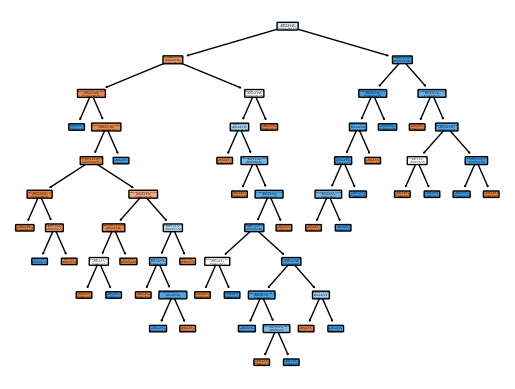

In [8]:
tree.plot_tree(DT,
               feature_names=X_train.columns.astype(str).tolist(),
               class_names=df_clean['target'].unique().astype(str).tolist(),
               filled=True,
               rounded=True)

Ahora sí vemos que nuestro accuracy no es perfecto, pero no sabemos en qué fallamos. Para ello podemos usar las otras métricas que hemos visto

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_predicted = DT.predict(X_test)
print('precision: %.2f' % precision_score(y_test, y_predicted))
print('recall: %.2f' % recall_score(y_test, y_predicted))
print('f1: %.2f' % f1_score(y_test, y_predicted))

precision: 0.96
recall: 0.91
f1: 0.93


Vemos una precisión alta pero un recall más bajo
Lo que nos indica que no siempre detectamos a todos los que tienen una enfermedad cardiovascular, pero cuando lo hacemos, es muy probable que sea cierto.

Otra forma de visualizarlo es con una matriz de confusión

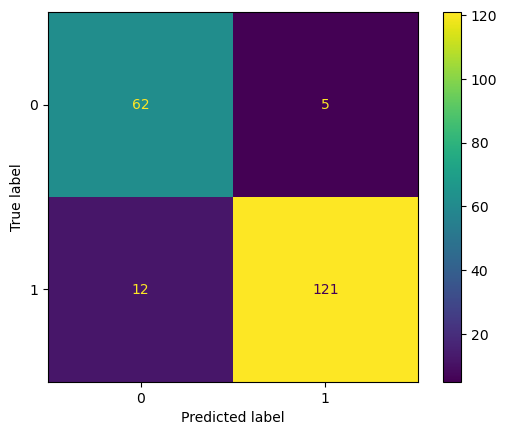

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predicted, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot()
plt.show()

De aquí vemos que tenemos una muy alta probabiidad de detectar los que si tienen una enfermedad cardiovascular

[Text(0.5597014925373134, 0.9545454545454546, 'slope <= 1.5\ngini = 0.493\nsamples = 800\nvalue = [353, 447]\nclass = 0'),
 Text(0.3283582089552239, 0.8636363636363636, 'chestpain <= 1.5\ngini = 0.225\nsamples = 394\nvalue = [343, 51]\nclass = 1'),
 Text(0.16417910447761194, 0.7727272727272727, 'serumcholestrol <= 66.0\ngini = 0.122\nsamples = 338\nvalue = [316, 22]\nclass = 1'),
 Text(0.13432835820895522, 0.6818181818181818, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 0'),
 Text(0.19402985074626866, 0.6818181818181818, 'serumcholestrol <= 466.0\ngini = 0.097\nsamples = 333\nvalue = [316, 17]\nclass = 1'),
 Text(0.16417910447761194, 0.5909090909090909, 'restingBP <= 166.0\ngini = 0.076\nsamples = 329\nvalue = [316, 13]\nclass = 1'),
 Text(0.05970149253731343, 0.5, 'restingrelectro <= 1.5\ngini = 0.007\nsamples = 281\nvalue = [280, 1]\nclass = 1'),
 Text(0.029850746268656716, 0.4090909090909091, 'gini = 0.0\nsamples = 274\nvalue = [274, 0]\nclass = 1'),
 Text(0.08955223880597014, 

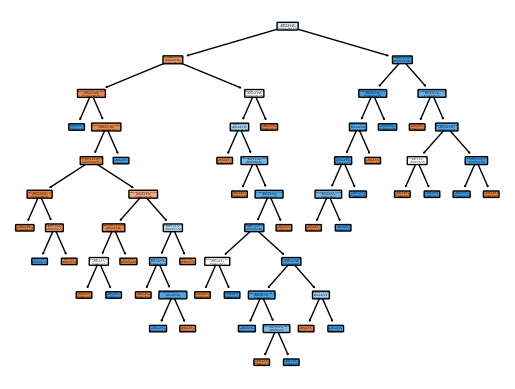

In [11]:
tree.plot_tree(DT,
               feature_names=X_train.columns.tolist(),
               class_names=df_clean['target'].unique().astype(str).tolist(),
               filled=True,
               rounded=True)

Cambiando posibilidades bajamos el accuracy

In [12]:
# Aumenta el número de muestras mínimas para continuar un nodo
DT = tree.DecisionTreeClassifier(random_state=rn_state, min_samples_leaf=10)
DT = DT.fit(X_train, y_train)
print('test accuracy: %.2f' % DT.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.92
test precision: 0.96
test recall: 0.91
test f1: 0.93


[Text(0.5865384615384616, 0.9285714285714286, 'slope <= 1.5\ngini = 0.493\nsamples = 800\nvalue = [353, 447]\nclass = 0'),
 Text(0.36538461538461536, 0.7857142857142857, 'chestpain <= 1.5\ngini = 0.225\nsamples = 394\nvalue = [343, 51]\nclass = 1'),
 Text(0.19230769230769232, 0.6428571428571429, 'restingBP <= 156.5\ngini = 0.122\nsamples = 338\nvalue = [316, 22]\nclass = 1'),
 Text(0.07692307692307693, 0.5, 'serumcholestrol <= 133.5\ngini = 0.028\nsamples = 279\nvalue = [275, 4]\nclass = 1'),
 Text(0.038461538461538464, 0.35714285714285715, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = 1'),
 Text(0.11538461538461539, 0.35714285714285715, 'oldpeak <= 0.45\ngini = 0.015\nsamples = 267\nvalue = [265, 2]\nclass = 1'),
 Text(0.07692307692307693, 0.21428571428571427, 'restingBP <= 140.5\ngini = 0.097\nsamples = 39\nvalue = [37, 2]\nclass = 1'),
 Text(0.038461538461538464, 0.07142857142857142, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = 1'),
 Text(0.11538461538461539, 0.071428

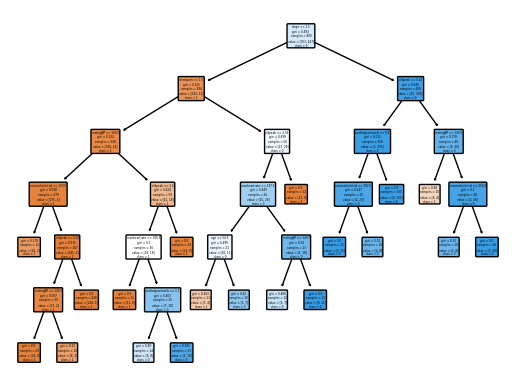

In [13]:
tree.plot_tree(DT,
               feature_names=X_train.columns.tolist(),
               class_names=df_clean['target'].unique().astype(str).tolist(),
               filled=True,
               rounded=True)

O limitando su profundidad

In [14]:
DT = tree.DecisionTreeClassifier(random_state=rn_state, max_depth=3)
DT = DT.fit(X_train, y_train)
print('test accuracy: %.2f' % DT.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.90
test precision: 0.96
test recall: 0.91
test f1: 0.93


[Text(0.5, 0.875, 'slope <= 1.5\ngini = 0.493\nsamples = 800\nvalue = [353, 447]\nclass = 0'),
 Text(0.25, 0.625, 'chestpain <= 1.5\ngini = 0.225\nsamples = 394\nvalue = [343, 51]\nclass = 1'),
 Text(0.125, 0.375, 'serumcholestrol <= 66.0\ngini = 0.122\nsamples = 338\nvalue = [316, 22]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.097\nsamples = 333\nvalue = [316, 17]\nclass = 1'),
 Text(0.375, 0.375, 'oldpeak <= 2.35\ngini = 0.499\nsamples = 56\nvalue = [27, 29]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.449\nsamples = 44\nvalue = [15, 29]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = 1'),
 Text(0.75, 0.625, 'oldpeak <= 5.45\ngini = 0.048\nsamples = 406\nvalue = [10, 396]\nclass = 0'),
 Text(0.625, 0.375, 'noofmajorvessels <= 0.5\ngini = 0.011\nsamples = 358\nvalue = [2, 356]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.147\nsamples = 25\nvalue = [2, 23]\nclass = 0'),


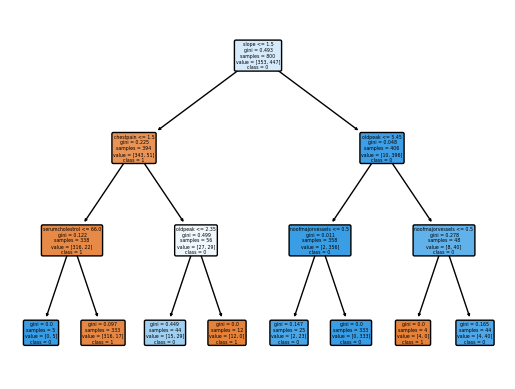

In [15]:
tree.plot_tree(DT,
               feature_names=X_train.columns.tolist(),
                class_names=df_clean['target'].unique().astype(str).tolist(),
               filled=True,
               rounded=True)

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=rn_state)
random_forest = random_forest.fit(X_train, y_train)
print('test accuracy: %.2f' % random_forest.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.97
test precision: 0.96
test recall: 0.91
test f1: 0.93


Vemos una mejora notable contra arboles de decisión.

Y podemos observar cada árbol y ver como cada uno empieza a especializarse en un tipo de dato

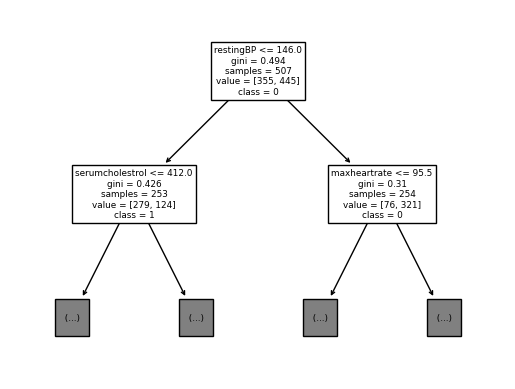

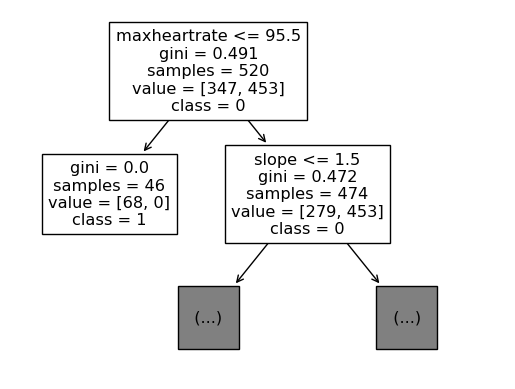

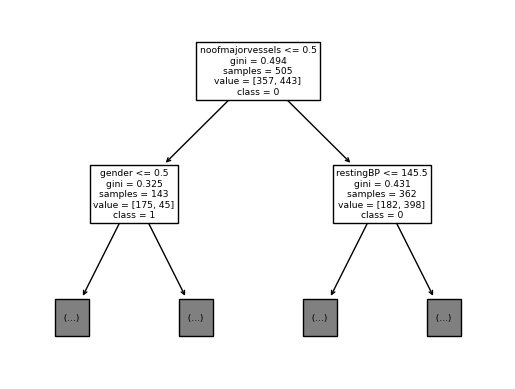

In [17]:
for decision_tree in random_forest.estimators_[:3]:
    tree.plot_tree(decision_tree,
                    feature_names=X_train.columns.tolist(),
                    class_names=df_clean['target'].unique().astype(str).tolist(),
                    max_depth=1)
    plt.show()

Esto es el efecto de bootstrap

## SVM

Dejando atrás a los modelos de ensemble, podemos pasar a los support vector machine. Que una vez más se cargan y entrenan de forma similar

In [18]:
from sklearn.svm import SVC
svc = SVC(random_state=rn_state, kernel='linear')
svc = svc.fit(X_train, y_train)
print('test accuracy: %.2f' % random_forest.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.97
test precision: 0.96
test recall: 0.91
test f1: 0.93


Podemos ver un mapa de svc, pero necesitamos usar sólo dos dimensiones

In [19]:
df_clean.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


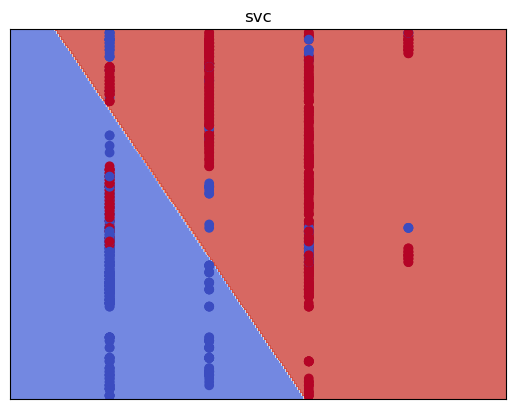

In [20]:
df_disease = pd.read_csv('data/Cardiovascular_Disease_dataset.csv')
X = np.array(df_disease.iloc[:, 3:5])  # we only take 2 features
                    # avoid this ugly slicing by using a two-dim dataset
y = df_disease['target']
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# title for the plots
titles = 'SVC'
svc = SVC(random_state=rn_state, kernel='linear')
svc = svc.fit(X, y)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("svc")

plt.show()

Podemos ver la dificultad de separar estos datos a base de un hiperplano.

Por lo que posiblemente, SVM no es el mejor modelo para resolver este problema

## Logistic regression

In [21]:
from sklearn import linear_model
logistic_regressor = linear_model.LogisticRegression(random_state=rn_state)
logistic_regressor = logistic_regressor.fit(X_train, y_train)
print('test accuracy: %.2f' % random_forest.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.97
test precision: 0.96
test recall: 0.91
test f1: 0.93


/Users/jesusmartinmejias/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Conclusion
De los modelos usados, tanto el random forest como el SVN tienen los mismos valores, más que el arbol de decisión normal. Usariamos random forest

In [22]:
df_clean.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [23]:
# entrada: age	gender	chestpain	restingBP	serumcholestrol	fastingbloodsugar	restingrelectro	maxheartrate	exerciseangia	oldpeak	slope	noofmajorvessels
example_data = [[20,1,2,120,0,0,1,147,0,5.3,3,3]]
prediction = DT.predict(example_data)
print(prediction)

[1]


/Users/jesusmartinmejias/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Ejercicio 2 Caso 2. Nivel de estrés
Tu departamento de Recursos Humanos quiere prevenir el estrés de los empleados dentro de la compañía. Para ello, lo
principal es detectar el nivel de estrés de estos.
Se te pide desarrollar una solución que indique el nivel de estrés de un empleado que responda a un cuestionario. Estos 
© Qualentum 4 niveles de estrés pueden ser: no estresado (0-3), estresado (3-6), extremadamente estresado (7-8).

Se te pide:
1. Seleccionar un algoritmo de los estudiados que pueda
devolver el nivel de estrés de la persona (0-8).
2. Determina qué variables son las que más información
dan al nivel de estrés de una persona.
3. Clasifica los resultados del algoritmo en las 3 categorías
que piden en RR. HH.
4. Reflexiona y responde a estas cuestiones: con el
algoritmo obtenido, ¿crees que los datos usados son
suficientes para poder detectar el estrés de las
personas?, ¿por qué?

Cargamos un dataset de kaggle ([perth-house-pries](https://www.kaggle.com/datasets/syuzai/perth-house-prices))

dedicado a la predicción de precios de casas en Boston.

In [58]:
df_estres = pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')
df_estres.head()
df_estres.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [59]:
df_estres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [60]:
df_estres.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [61]:
df_estres.nunique()



Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [62]:
df_estres['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Vemos que en sleep disorder hay 219 NaN, los rellenamos con 0
Vemos que el dataset tiene una mezcla de valores numéricos y strings.
Convertimos a numéricos los valores categóricos

Convierto las variables categóricas en numéricas

In [76]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

df_coded = df_estres.copy()
# Convertimos las variables categóricas a numéricas
for column in df_coded.columns:
    if df_coded[column].dtype == 'object':
        # Fit and transform the column
        df_coded[column] = label_encoder.fit_transform(df_coded[column])
# Rellenamos NaN de Fill Disorder con 0
df_coded['Sleep Disorder'] = df_coded['Sleep Disorder'].fillna(0)
# Quitmaos el ID no nos sirve para el modelo
df_coded.drop(columns=['Person ID'], inplace=True)
df_coded.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,2
1,1,28,1,6.2,6,60,8,0,9,75,10000,2
2,1,28,1,6.2,6,60,8,0,9,75,10000,2
3,1,28,6,5.9,4,30,8,2,22,85,3000,1
4,1,28,6,5.9,4,30,8,2,22,85,3000,1


Con los datos limpios, podemos dividirlos en train y test (Validación).

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_coded.drop(columns=['Stress Level']),
    df_coded['Stress Level'],
    test_size=0.2,
    random_state=rn_state)
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
220,0,44,10,6.6,7,45,3,20,65,6000,0
17,1,29,1,6.0,6,30,0,6,70,8000,1
62,1,32,1,6.2,6,30,0,9,72,5000,2
96,0,36,0,7.2,8,60,0,0,68,7000,2
72,1,33,1,6.1,6,30,0,9,72,5000,2


Vamos a probar con regresión lineal

In [78]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor = regressor.fit(X_train, y_train)

Con esto hemos entrenado un modelo, ahora podríamos simplemente utilizarlo para predecir el precio de una casa.

In [82]:
example_data = [[0,44,10,6.6,7,45,3,20,65,6000,0]]
prediction = regressor.predict(example_data)
rounded_prediction = round(prediction[0])
unique_values = df_coded['Stress Level'].unique()
rounded_prediction = min(unique_values, key=lambda x:abs(x-rounded_prediction))
print(rounded_prediction)


4


/Users/jesusmartinmejias/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Vamos a analizar los pesos de cada variable

In [83]:
interceptor = regressor.intercept_
weights = regressor.coef_
print(interceptor)
print(weights)

8.21107370927054
[ 7.64812033e-01  5.92559211e-02 -9.04236018e-02 -4.39930185e-01
 -1.14926877e+00 -1.09015465e-02 -1.54504974e-01 -2.79073685e-03
  7.08394102e-02  2.82658635e-04  1.08937771e-01]


Vamos a ver el R2 del modelo

In [84]:
score = regressor.score(X_train, y_train)
print('R^2 del modelo: %.2f'% score)

R^2 del modelo: 0.95


EL R2 es bastante alto, vamos a ver otras métricas

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

y_predicted = regressor.predict(X_train)
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted))
print('Mean squared error: %.2f' % mean_squared_error(y_train, y_predicted))

Mean absolute error: 0.27
Mean squared error: 0.16


El error medio absoluto es bajo

El squared error es aun menos

In [86]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted)))

Mean absolute error: 0.27
Root Mean squared error: 0.40


Si los errores son correctos, deberíamos poder ver una varianza entre lo predicho y lo real de alrededor de 100.000 - 200.000 dolares.

In [87]:
for predicted, actual in zip(y_predicted[:10], y_train[:10]):
    print(f'predicted: {predicted:.2f}, actual: {actual:.2f}, difference: {abs(predicted - actual):.2f}')

predicted: 4.26, actual: 4.00, difference: 0.26
predicted: 8.05, actual: 8.00, difference: 0.05
predicted: 7.54, actual: 8.00, difference: 0.46
predicted: 4.34, actual: 4.00, difference: 0.34
predicted: 7.64, actual: 8.00, difference: 0.36
predicted: 3.99, actual: 3.00, difference: 0.99
predicted: 3.02, actual: 3.00, difference: 0.02
predicted: 2.79, actual: 3.00, difference: 0.21
predicted: 2.91, actual: 3.00, difference: 0.09
predicted: 8.81, actual: 8.00, difference: 0.81


Los errores parecen corresponderse a cifras con sentido, pero puede que haya varias cifras con errores muy grandes

In [90]:
counter = 0
for predicted, actual in zip(y_predicted, y_train):
    if np.absolute(actual - predicted) > 0.50:
        counter += 1
        print(f'big error predicted: {predicted:.2f}, actual: {actual:.2f}, diferencia: {abs(predicted - actual):.2f}')
        if counter > 10:
            break

big error predicted: 3.99, actual: 3.00, diferencia: 0.99
big error predicted: 8.81, actual: 8.00, diferencia: 0.81
big error predicted: 4.50, actual: 4.00, diferencia: 0.50
big error predicted: 3.48, actual: 4.00, diferencia: 0.52
big error predicted: 8.35, actual: 7.00, diferencia: 1.35
big error predicted: 6.19, actual: 7.00, diferencia: 0.81
big error predicted: 4.95, actual: 6.00, diferencia: 1.05
big error predicted: 4.50, actual: 4.00, diferencia: 0.50
big error predicted: 2.39, actual: 4.00, diferencia: 1.61
big error predicted: 4.50, actual: 4.00, diferencia: 0.50
big error predicted: 5.96, actual: 7.00, diferencia: 1.04


Los errores más grandes se acercan a lo estimado por el RMSE. Por lo que es un error que nos indicará mejor por cuanto se equivoca el modelo en el peor de los casos.

Aún podemos hacer algo mejor e intentar estimar en qué casos el modelo es más propenso a equivocarse.

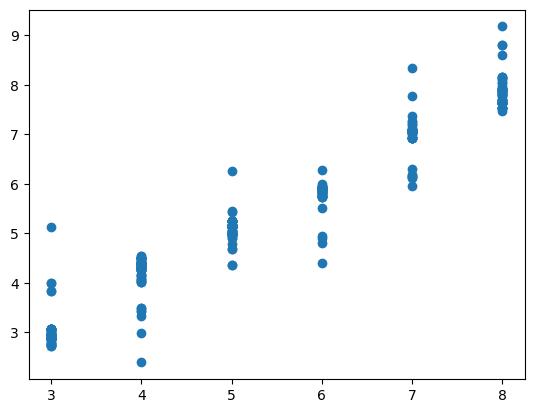

In [91]:
from matplotlib import pyplot as plt
plt.scatter(y_train, y_predicted)
plt.show()

Aquí podemos ver que a precios bajos, nuestro modelo puede dar valores negativos, y que hay un ligero incremento de precisión a medida que aumenta el precio (Aunque muy ligero). Por lo general las métricas se van a mantener a lo largo de todo el rango de precios.

Por ahora hemos evaluado los resultados de entrenamiento, pero realmente lo que nos interesa es el resultado de test. Estos son datos que el modelo desconoce, y por lo tanto, nos darán una mejor idea de cómo se comportará el modelo en el mundo real.

In [92]:
y_predicted_train = regressor.predict(X_train)
print('Train Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted_train))
print('Train Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted_train)))

y_predicted = regressor.predict(X_test)
print('Test Mean absolute error: %.2f' % mean_absolute_error(y_test, y_predicted))
print('Test Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_predicted)))

Train Mean absolute error: 0.27
Train Mean squared error: 0.40
Test Mean absolute error: 0.31
Test Mean squared error: 0.52


Vemos que los resultados son similares, por lo que podemos estar seguros de que el modelo no está sobreajustado.

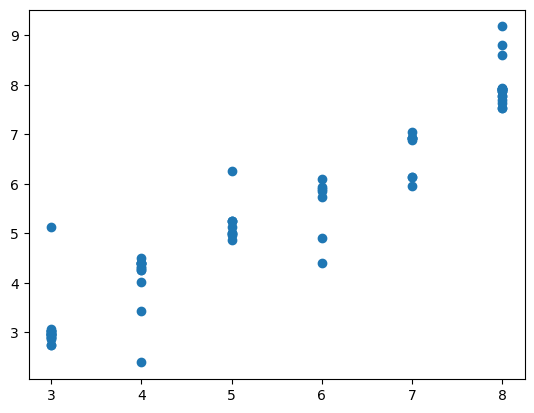

In [93]:
plt.scatter(y_test, y_predicted)
plt.show()

Incluso en la gráfica vemos un comportamiento similar

## Modelo LASSO

En regresión lineal nos hemos parado más en cómo evaluar un modelo de regresión, que en el modelo en sí. Ahora vamos a ver un modelo de regresión lineal regularizado, LASSO.

Vamos a ver que los pasos son similares sino idénticos a los de regresión lineal.

Cargamos el modelo y lo entrenamos

In [94]:
lasso = linear_model.Lasso(alpha=0.1)
lasso = lasso.fit(X_train, y_train)


Este modelo ya podemos usarlo para hacer nuevas predicciones

In [96]:
example_data = [[0,44,10,6.6,7,45,3,20,65,6000,0]]
prediction = lasso.predict(example_data)
rounded_prediction = round(prediction[0])
unique_values = df_coded['Stress Level'].unique()
rounded_prediction = min(unique_values, key=lambda x:abs(x-rounded_prediction))
print(rounded_prediction)

5


/Users/jesusmartinmejias/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Podemos calcular sus métricas de la misma forma

In [97]:
y_predicted = lasso.predict(X_train)
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted)))

Mean absolute error: 0.40
Root Mean squared error: 0.52


Y podemos visualizarlo igual

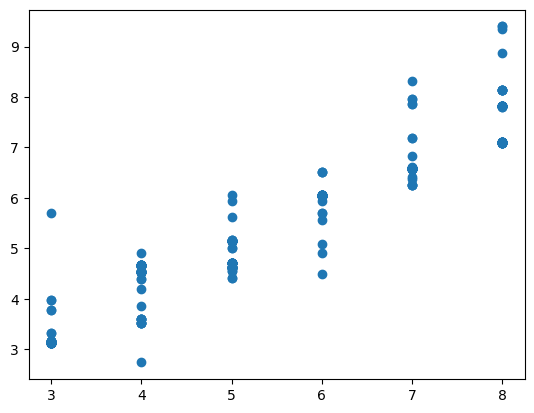

In [98]:
plt.scatter(y_train, y_predicted)
plt.show()

Igual en test

In [99]:
y_predicted = lasso.predict(X_test)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_predicted))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_predicted)))

Mean absolute error: 0.45
Root Mean squared error: 0.61


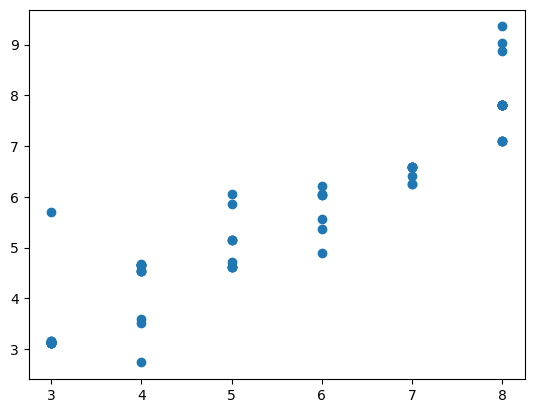

In [100]:
plt.scatter(y_test, y_predicted)
plt.show()

# Vamos a probar con un arbol de decisión

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_coded.drop(columns=['Stress Level']),
    df_coded['Stress Level'],
    test_size=0.2,
    random_state=rn_state)

Vamos a ver los valores 

In [107]:
DT = tree.DecisionTreeClassifier(random_state=rn_state)
DT = DT.fit(X_train, y_train)
print('train accuracy: %.2f' % DT.score(X_train, y_train))
print('test accuracy: %.2f' % DT.score(X_test, y_test))

train accuracy: 1.00
test accuracy: 0.99


In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_predicted = DT.predict(X_test)
print('precision: %.2f' % precision_score(y_test, y_predicted, average='macro'))
print('recall: %.2f' % recall_score(y_test, y_predicted, average='macro'))
print('f1: %.2f' % f1_score(y_test, y_predicted, average='macro'))

precision: 0.99
recall: 0.98
f1: 0.98


Vemos que el arbol de decisión es un mejor modelo que la regresión linear. Vamos a probar con random forest

In [113]:
random_forest = RandomForestClassifier(random_state=rn_state)
random_forest = random_forest.fit(X_train, y_train)
print('test accuracy: %.2f' % random_forest.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted, average='macro'))
print('test recall: %.2f' % recall_score(y_test, y_predicted, average='macro'))
print('test f1: %.2f' % f1_score(y_test, y_predicted, average='macro'))

test accuracy: 1.00
test precision: 0.99
test recall: 0.98
test f1: 0.98


# Conclusiones

En ambos casos el mejor modelo es random forest